# SIC - Data Preprocessing Task

### Imports & configs

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

### Read Data

In [3]:
df = pd.read_csv("housing2.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600,NEAR BAY,male
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138,8.3014,358500,NEAR BAY,female
2,-122.24,37.85,52.0,1467,190.0,496.0,177,7.2574,352100,NEAR BAY,male
3,-122.25,37.85,52.0,1274,235.0,558.0,219,5.6431,341300,NEAR BAY,female
4,-122.25,37.85,NaN,1627,280.0,NaN,259,3.8462,342200,NEAR BAY,male


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20382 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      15758 non-null  float64
 5   population          20596 non-null  float64
 6   households          19335 non-null  object 
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              16620 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 1.7+ MB


### Data Preprocessing

In [9]:
total = df.shape[0]
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = df[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")


housing_median_age: 258 (1.25%)
total_bedrooms: 4882 (23.653%)
population: 44 (0.213%)
households: 1305 (6.323%)
median_income: 2767 (13.406%)
gender: 4020 (19.477%)


#### Imputation using KNN

In [12]:
df_imp = df.copy()

In [13]:
numerical_features = [col for col in df_imp.columns if df_imp[col].dtype != 'object']
df_imp = df_imp[numerical_features]

In [14]:
knn = KNNImputer(n_neighbors = 3)

knn.fit(df_imp)

KNNImputer(n_neighbors=3)

In [15]:
X = knn.transform(df_imp)
df_imp = pd.DataFrame(X, columns = numerical_features)

df_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   median_income       20640 non-null  float64
 7   median_house_value  20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [18]:
df_imp.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
median_income         0
median_house_value    0
dtype: int64

------------------------------
longitude:


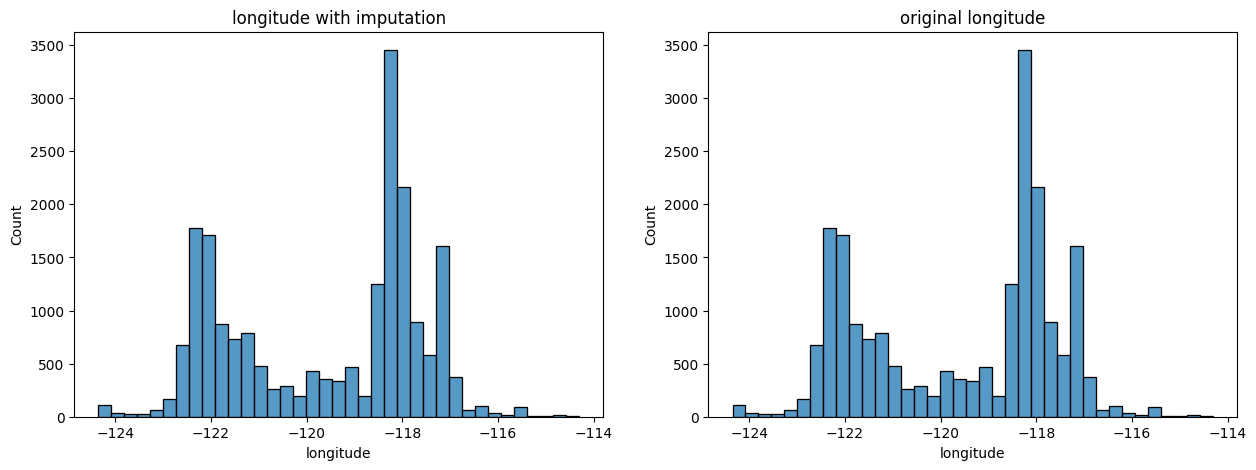

------------------------------
latitude:


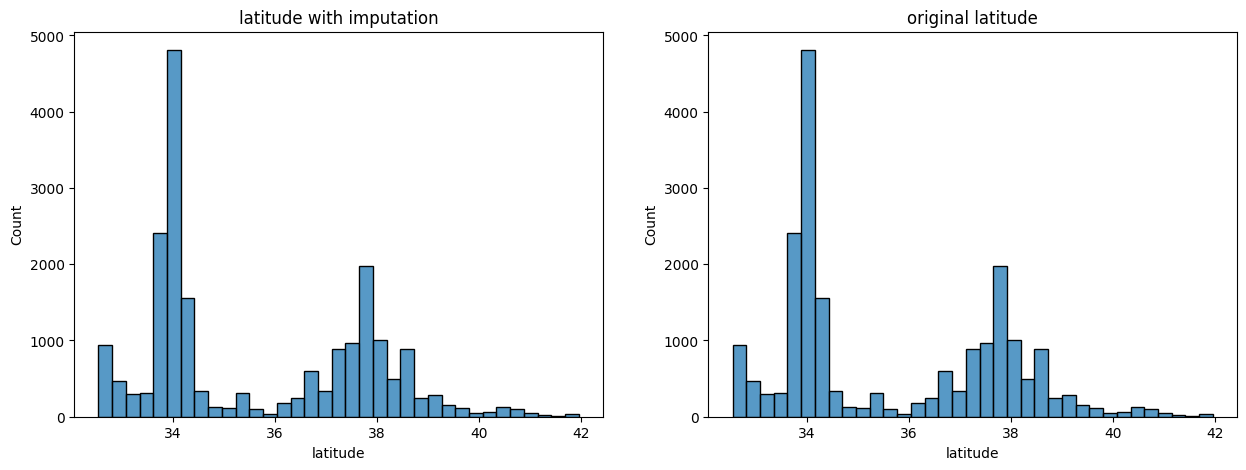

------------------------------
housing_median_age:


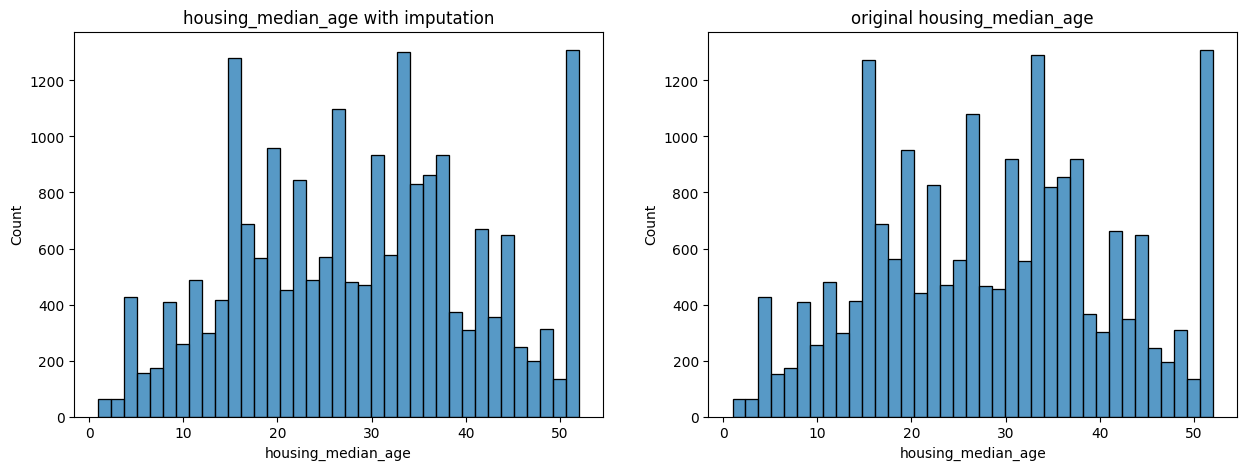

------------------------------
total_rooms:


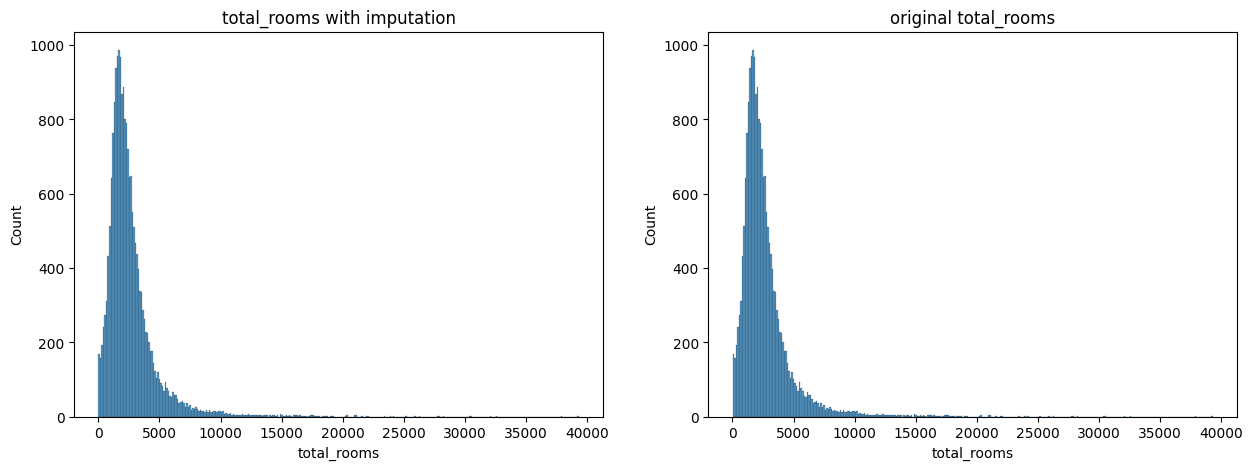

------------------------------
total_bedrooms:


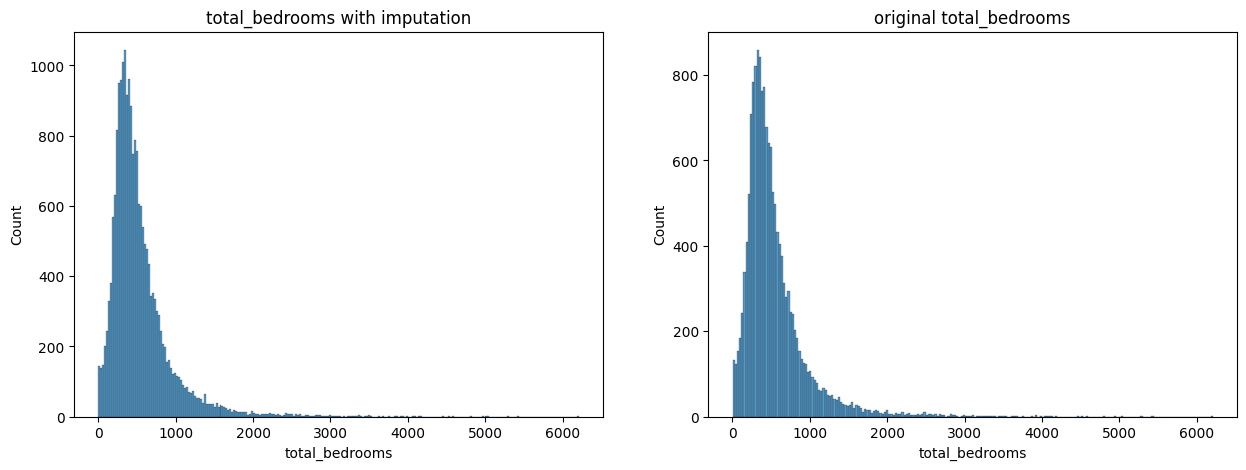

------------------------------
population:


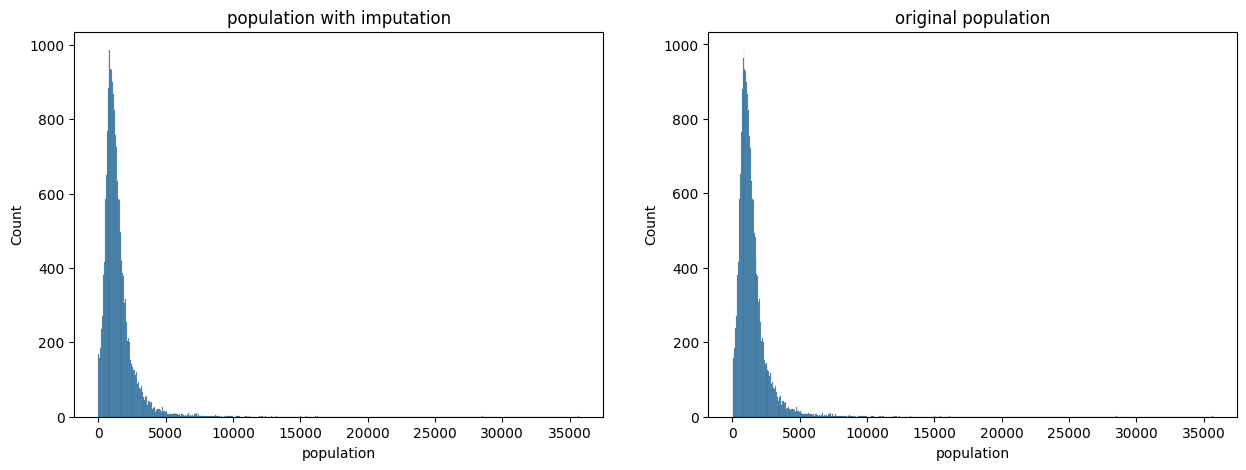

------------------------------
median_income:


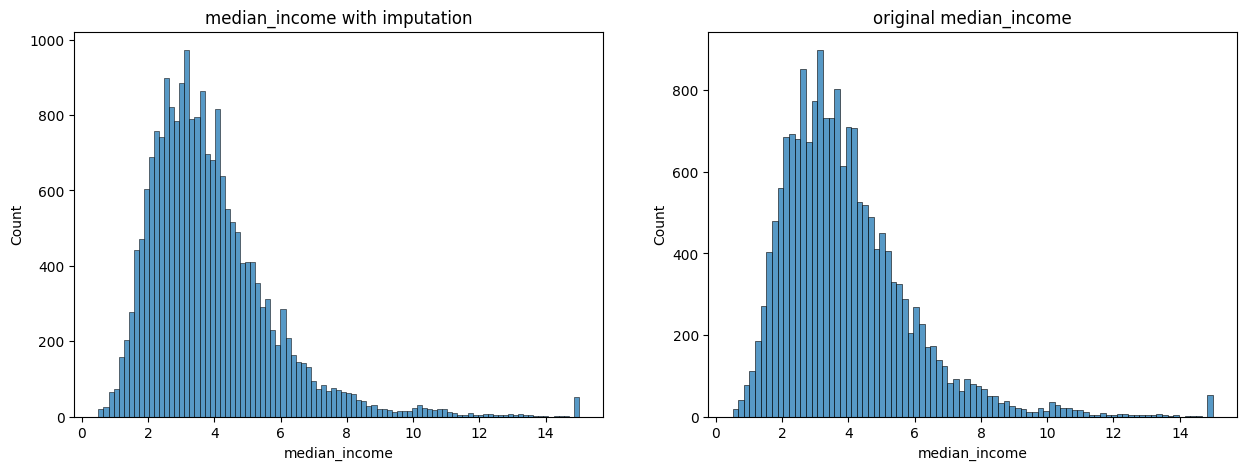

------------------------------
median_house_value:


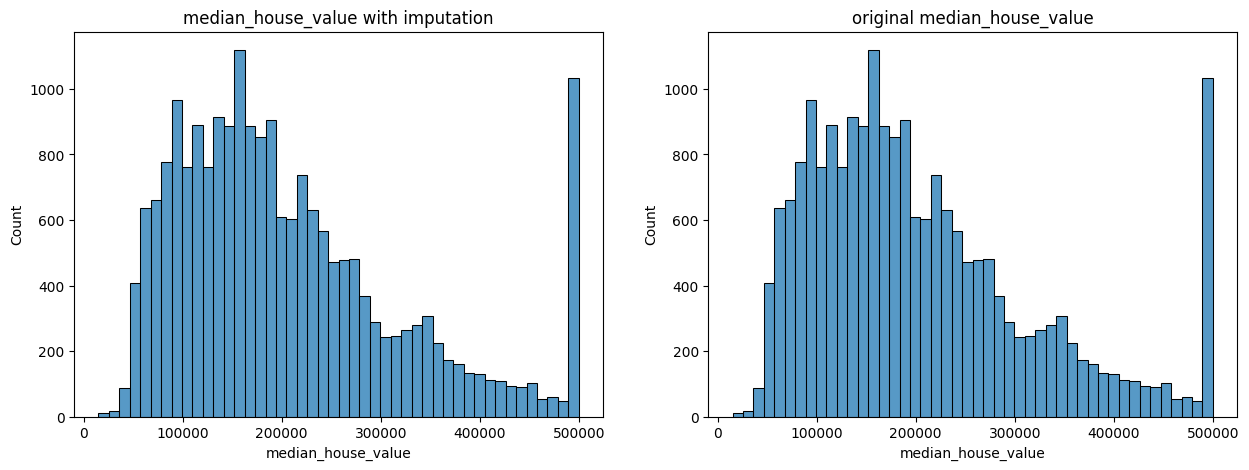

In [34]:
for feature in numerical_features:
    print('-'*30)
    print(f"{feature}:")
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.histplot(ax=axes[0], data=df_imp, x=feature)
    axes[0].set_title(f"{feature} with imputation")
    sns.histplot(ax=axes[1], data=df, x=feature)
    axes[1].set_title(f"original {feature}")
    plt.show()

In [43]:
df_imp[df.isna().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,median_income,median_house_value
4,-122.25,37.85,35.000000,1627.0,280.000000,676.000000,3.8462,342200.0
5,-122.25,37.85,36.666667,919.0,213.000000,620.666667,4.0368,269700.0
6,-122.25,37.84,33.000000,2535.0,529.666667,1234.333333,3.6591,299200.0
7,-122.25,37.84,34.333333,3104.0,604.000000,1518.333333,3.1200,241400.0
8,-122.26,37.84,42.000000,2555.0,453.666667,1272.000000,2.0804,226700.0
...,...,...,...,...,...,...,...,...
20627,-121.32,39.13,37.000000,358.0,78.000000,169.000000,3.0000,162500.0
20628,-121.48,39.10,21.000000,2043.0,474.000000,1018.000000,2.5952,92400.0
20629,-121.39,39.12,16.000000,10035.0,1924.000000,6912.000000,2.0943,108300.0
20630,-121.32,39.29,33.333333,2640.0,530.666667,1257.000000,3.5673,112000.0
